# **Aim : Find out the most successful teams, players and factors contributing win or loss of a team.**

Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. Suggest teams or players a company should endorse for its products.

Data Source : https://bit.ly/34SRn3b

<h1 style="background-color:DodgerBlue;">Importing Necessary Libraries</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="background-color:MediumSeaGreen;">Reading 'matches.csv' dataset.</h1>

In [3]:
match_df = pd.read_csv('matches.csv')
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Checking the shape of dataset
match_df.shape

(756, 18)

In [5]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


<h1 style="background-color:Violet;">Reading 'deliveries.csv' dataset</h1>


In [7]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
#Checking the shape of dataset
deliveries_df.shape

(179078, 21)

In [9]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


<h1 style="background-color:Tomato;">Merging both datasets into new dataset named 'ipl_df'</h1>

In [11]:
ipl_df = pd.merge(deliveries_df,match_df, left_on='match_id', right_on ='id')
ipl_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [12]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [13]:
ipl_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [14]:
match_df.set_index('id', inplace=True)

In [15]:
match_df.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2009-04-30,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


<h1 style="background-color:SlateBlue;">Data Pre-processing</h1>

In [16]:
match_df[match_df.city.isnull()][['city' , 'venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [17]:
match_df.city = match_df.city.fillna('Dubai')

In [18]:
match_df[(match_df.umpire1.isnull())| (match_df.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [19]:
match_df = match_df.drop('umpire3', axis = 1)

<h1 style="background-color:Gray;">Exploratory Data Analysis</h1>

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

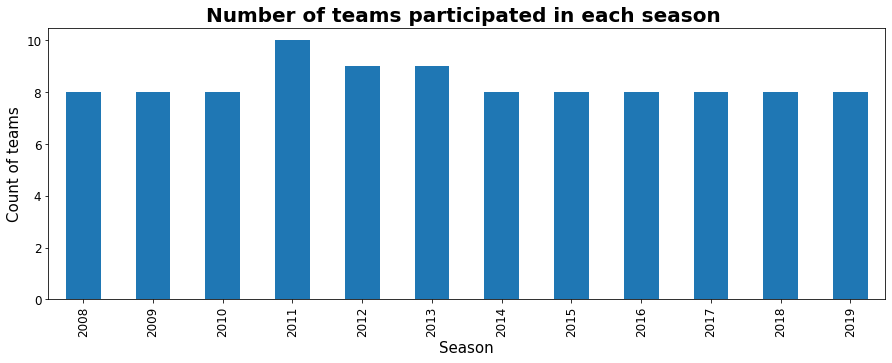

In [20]:
match_df.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated in each season ",fontsize=20,fontweight="bold")
plt.ylabel("Count of teams", size = 15)
plt.xlabel("Season", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

C:\Users\500068735\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

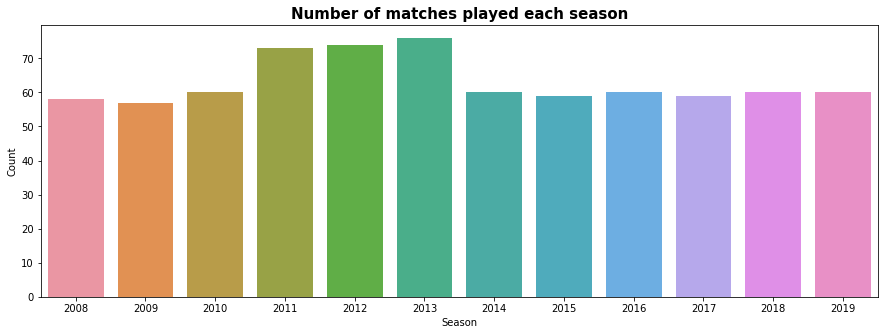

In [21]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = match_df)
plt.title("Number of matches played each season",fontsize=15,fontweight="bold")
plt.ylabel("Count", size = 10)
plt.xlabel("Season", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

In [22]:
match_df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
                  ..
J Botha            1
MJ Lumb            1
AD Mathews         1
Kuldeep Yadav      1
S Badrinath        1
Name: player_of_match, Length: 226, dtype: int64

Text(0.5, 0, 'Players: ')

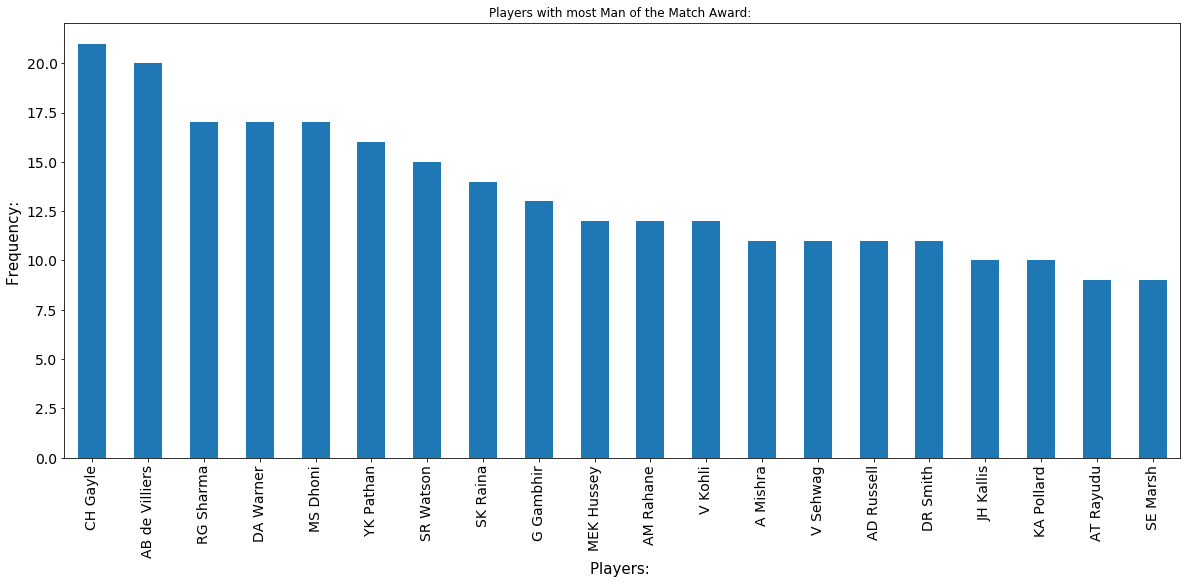

In [23]:
#Bar-plot for better visualization for most Man of the Match awards.

mom = match_df['player_of_match'].value_counts()
mom.head(20).plot(kind='bar', figsize=(20,8), fontsize=14)
plt.title("Players with most Man of the Match Award: ")
plt.ylabel('Frequency: ', size= 15)
plt.xlabel('Players: ', size= 15)


Players with most Man of the Match Awards:
- Chris Gayle
- AB de Villiers
- MS Dhoni
- David Warner
- Rohit Sharma

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

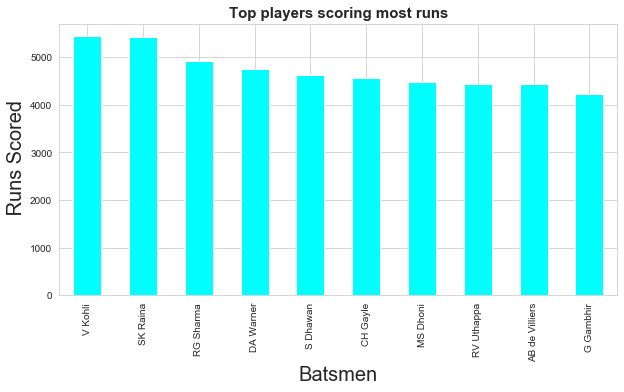

In [62]:
#Players with most number of runs

ipl_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'cyan',
                                                                                            figsize = (10,5))
plt.title("Top players scoring most runs", fontsize = 15, fontweight = 'bold')
plt.xlabel("Batsmen", size = 20)
plt.ylabel(" Runs Scored", size = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)

- Virat Kohli is the player that has scored most no. of runs followed by Suresh Raina and Rohit Sharma in the second & third position respectively.
- Most players in this list are openers or they play in at 3(start of the innings).
- MS Dhoni is an exception here as he comes lower down the order.

In [73]:
#Players with the highest strike rates.


noofballs = pd.DataFrame(ipl_df.groupby('batsman')['ball'].count()) #number of matches played by each batsman

runs = pd.DataFrame(ipl_df.groupby('batsman')['batsman_runs'].sum()) #runs made by each batsman

seasons_played = pd.DataFrame(ipl_df.groupby('batsman')['season'].nunique()) 

batsmanstrike_rate = pd.DataFrame({'balls':noofballs['ball'],'run':runs['batsman_runs'],'season':seasons_played['season']})
batsmanstrike_rate.reset_index(inplace = True)

batsmanstrike_rate['strike_rate'] = batsmanstrike_rate['run']/batsmanstrike_rate['balls']*100
higheststrike_rate = batsmanstrike_rate[batsmanstrike_rate.season.isin([11,12])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)
higheststrike_rate.rename(columns = {'season':'Seasons played', 'batsman':'Player_name', 'strike_rate':'Strike rate'}).head(5)


,Seasons played,Player_name,Strike rate
26,12,AB de Villiers,148.740343
92,11,CH Gayle,145.640370
509,12,YK Pathan,138.860326
444,11,SR Watson,136.945813
290,12,MS Dhoni,134.930681


Top 5 players having the highest strike rate:
- AB de Villiers3
- Chris Gayle
- Yusuf Pathan
- Shane Watson
- MS Dhoni

C:\Users\500068735\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


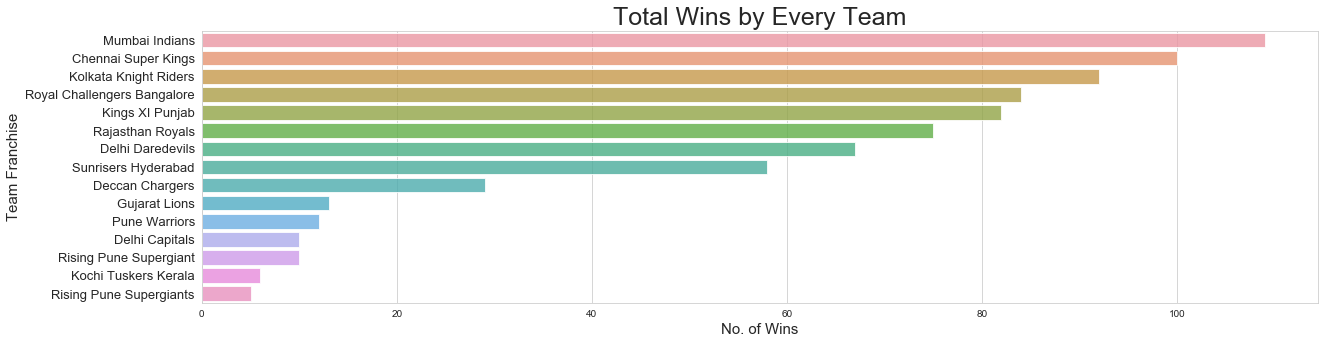

In [68]:
#No. of wins by every team

sns.set_style('whitegrid')
ls = match_df['winner'].value_counts().sort_values(ascending = False)


plt.figure(figsize = (20,5))
sns.set_color_codes(palette="bright")
total_wins =sns.barplot(ls.values, ls.index, alpha = .8)

plt.title("Total Wins by Every Team", fontsize = 25)
plt.xlabel("No. of Wins",fontsize =15)
plt.ylabel("Team Franchise",fontsize =15)
total_wins.set_yticklabels(labels= ls.index, fontsize = 13)
plt.show()

C:\Users\500068735\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


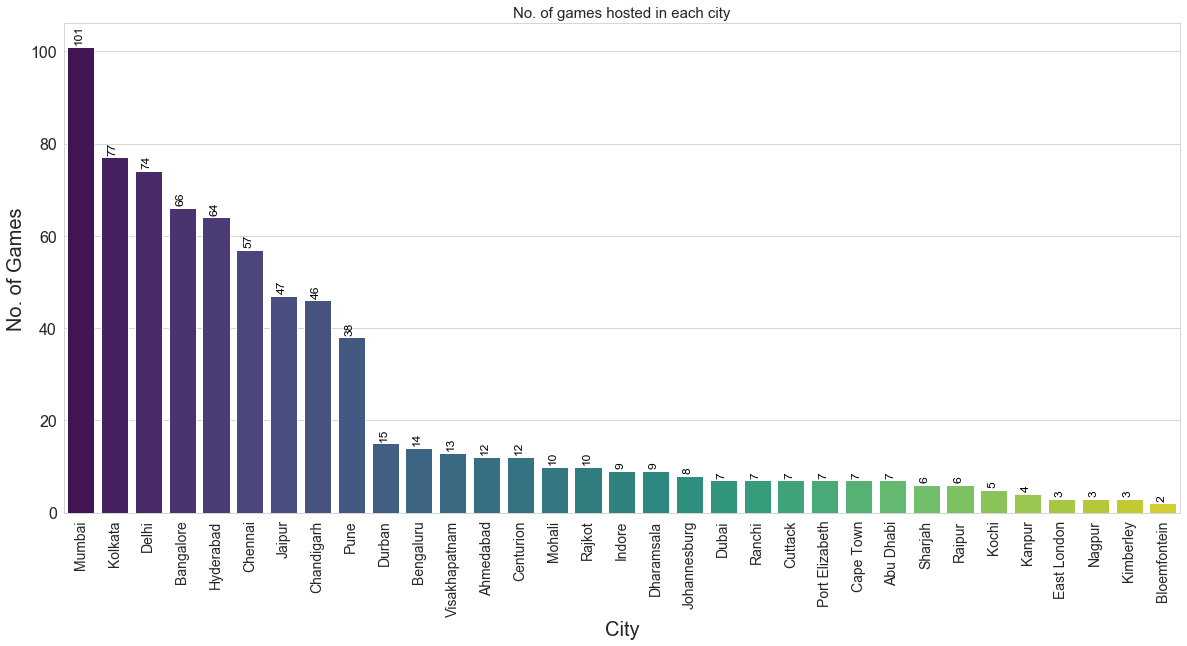

In [75]:
#No. of games hosted in each city.


fig=plt.gcf()
fig.set_size_inches(20,9)
sns.countplot(match_df['city'],order=match_df['city'].value_counts().index,palette='viridis')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('No. of Games',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0 
cities=pd.DataFrame(match_df['city'].value_counts())
cities['name'] = match_df['city'].value_counts().index
for i in cities['city']:
    plt.text(count-.2,i+1,str(i),rotation=90,color='black',size=12)
    count += 1
plt.show()

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

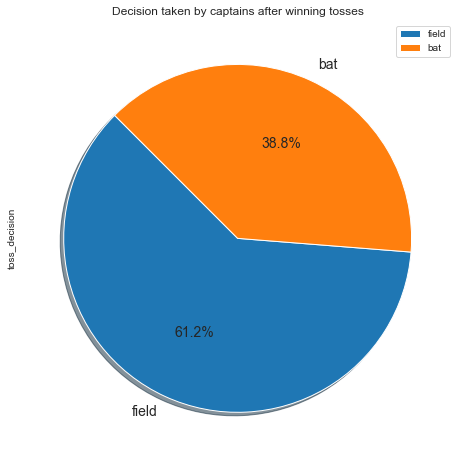

In [53]:
#Pie-chart that shows what captains decide after winning the toss

match_df['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(20,8), shadow=True, startangle=135, legend=True,)
plt.title('Decision taken by captains after winning tosses')

- Most team captains have chosen to field after winning the toss. 

C:\Users\500068735\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'frequency')

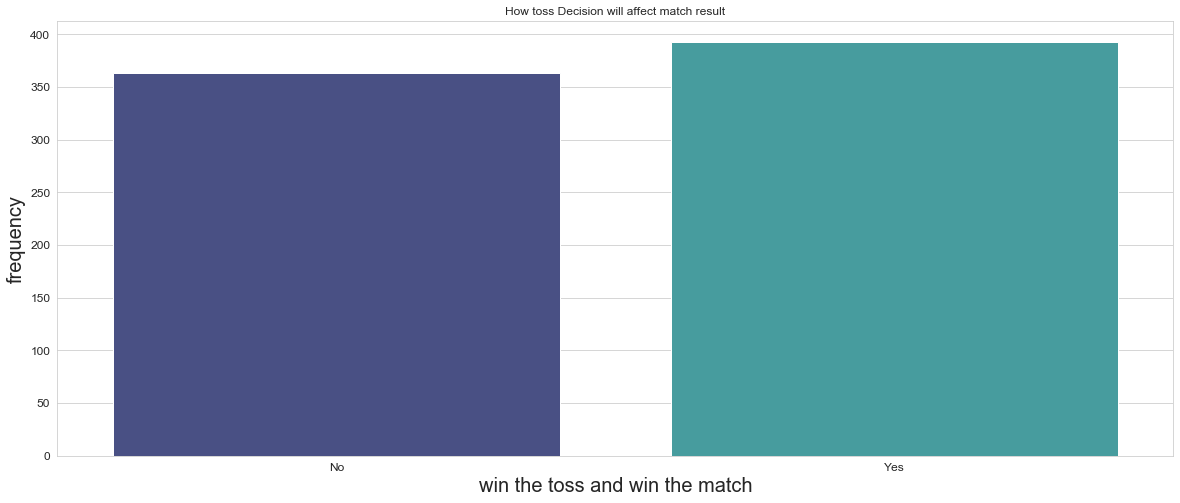

In [48]:
#Effect of toss on match outcome


match_df['toss_win_game_win'] = np.where((match_df.toss_winner == match_df.winner),'Yes','No')
plt.figure(figsize = (20,8))
sns.countplot('toss_win_game_win', data=match_df, palette = "mako")
plt.title("How toss Decision will affect match result")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("win the toss and win the match", fontsize = 20)
plt.ylabel("frequency", fontsize = 20)

- The team that wins the toss, has turned out to be the winner in most of the matches. 
- The team that wins the toss has a higher rate of winning.

Text(0, 0.5, 'frequency')

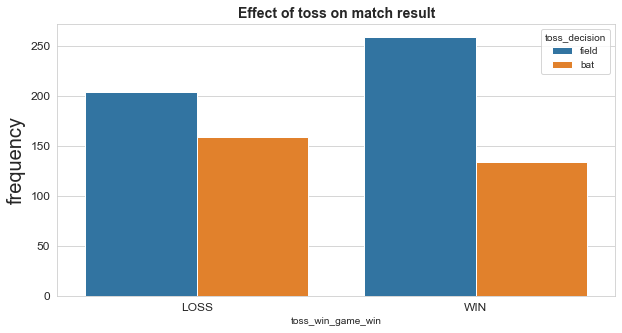

In [61]:
#Counter-plot for better visualization

match_df['toss_win_game_win'] = np.where((match_df.toss_winner == match_df.winner),'WIN','LOSS')
plt.figure(figsize = (10,5))
sns.countplot('toss_win_game_win', data=match_df, hue = 'toss_decision')
plt.title("Effect of toss on match result", fontsize=14,fontweight="bold")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel("frequency", fontsize = 20)

**Some of the insights found by EDA :**

- Chris Gayle has received the highest no. of awards for Man of the Match.
- Virat Kohli has scored the highest runs among all the players.
- AB de Villiers has the highest strike rate among all the players.
- Mumbai Indians(MI) has won the highest number of matches as a team.
- Mumbai turns out to be the city in which most number of matches were hosted.
- According to analysis, teams which bowl first have a higher rate of winning the matches.
  

**Suggest a team and its players a company should endorse for it's products :**

- If a franchise is looking for a good batsman who has an exceptional record, then they should go for Virat Kohli, Chris Gayle, AB de Villiers, Rohit Sharma, David Warner.
- If a franchise is searching for a good finisher with a good strike rate, then they should go for MS Dhoni, Yusuf Pathan, AB de Villiers.
